In [ ]:
# Install visualkeras, in order to visualize network architecture
pip install visualkeras

In [ ]:
#============= Import necessary utilities ===============
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import visualkeras

## **Data Pre-processing**

***Προεπεξεργασία δεδομένων με σκοπό την βέλτιστη απόδοση του δικτύου.***

***Data are being pre-processed, in order to optimize accuracy of each network***

In [ ]:
# Some hyperparameters
batch_size = 250
num_classes = 10
epochs = 50
# Seed, to ensure repeatability
random.seed(0)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(50000,1024 * 3) # reshape 50,000 32 x 32 x 3 matrices into 50,000 1024*3-length vectors.
x_test = x_test.reshape(10000,1024 * 3)   # reshape 10,000 32 x 32 x 3 matrices into 10,000 1024*3-length vectors

x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255

In [ ]:
# Define the text labels
cifar10_labels = ["Airplane",  # index 0
                        "Automobile",      # index 1
                        "Bird",     # index 2 
                        "Cat",        # index 3 
                        "Deer",         # index 4
                        "Dog",       # index 5
                        "Frog",        # index 6 
                        "Horse",      # index 7 
                        "Ship",          # index 8 
                        "Truck"]   # index 9


## **Multilayer Perceptron**
**(as defined by the project description)**

In [ ]:
model = Sequential()

model.add(Dense(32,input_shape=((1024 * 3,)))) #initially 32
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                98336     
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 144,362
Trainable params: 144,362
Non-trainable params: 0
_________________________________________________________________


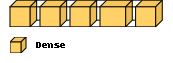

In [ ]:
# Visualize Model
visualkeras.layered_view(model,legend = True)

In [ ]:
# Model Training
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

hist = model.fit(x_train, y_train,
          #steps_per_epoch = len(x_train)/batch_size,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          #shuffle = True,
          verbose=1)

Epoch 1/50
172/180 [===========================>..] - ETA: 0s - loss: 1.8925 - accuracy: 0.3105
Epoch 00001: val_loss improved from inf to 1.76202, saving model to best_weights.hdf5
180/180 [==============================] - 2s 5ms/step - loss: 1.8851 - accuracy: 0.3138 - val_loss: 1.7620 - val_accuracy: 0.3610
Epoch 2/50
174/180 [============================>.] - ETA: 0s - loss: 1.7059 - accuracy: 0.3846
Epoch 00002: val_loss improved from 1.76202 to 1.66810, saving model to best_weights.hdf5
180/180 [==============================] - 1s 4ms/step - loss: 1.7053 - accuracy: 0.3848 - val_loss: 1.6681 - val_accuracy: 0.3972
Epoch 3/50
173/180 [===========================>..] - ETA: 0s - loss: 1.6285 - accuracy: 0.4118
Epoch 00003: val_loss improved from 1.66810 to 1.60862, saving model to best_weights.hdf5
180/180 [==============================] - 1s 4ms/step - loss: 1.6270 - accuracy: 0.4131 - val_loss: 1.6086 - val_accuracy: 0.4214
Epoch 4/50
175/180 [============================>.] -

In [ ]:
# Model Evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.4195 - accuracy: 0.5001
Test loss: 1.4195231199264526
Test accuracy: 0.5001000165939331


Text(0.5, 1.0, ' FC NN Confusion Matrix')

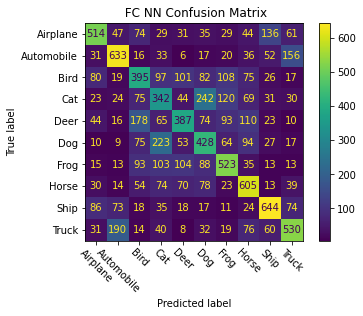

In [ ]:
y_hat = model.predict(x_test) # Predict using the newly-trained model
classes = np.argmax(y_hat,axis=1) # convert to class numbers

# Create confusion matrix
M = confusion_matrix(np.argmax(y_test, axis=1), classes) # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=cifar10_labels).plot(xticks_rotation=-45)
plt.title(' FC NN Confusion Matrix')

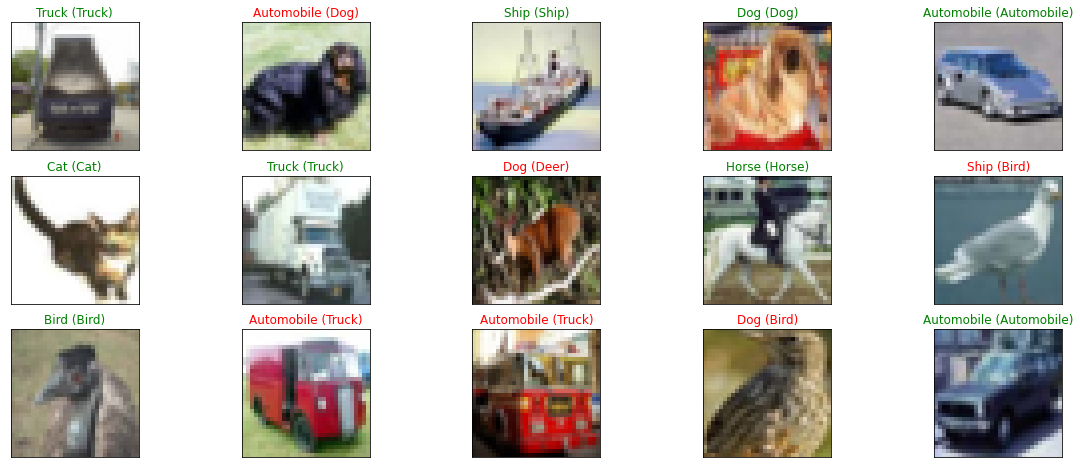

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(32,32,3))) # reshape image in order to plot
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

## **Convolutional Network**
**As defined by project description**

In [ ]:
# Re-initilize some parameters
batch_size = 100
num_classes = 10
epochs = 100


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255


# Define the text labels
cifar10_labels = ["Airplane",  # index 0
                        "Automobile",      # index 1
                        "Bird",     # index 2 
                        "Cat",        # index 3 
                        "Deer",         # index 4
                        "Dog",       # index 5
                        "Frog",        # index 6 
                        "Horse",      # index 7 
                        "Ship",          # index 8 
                        "Truck"]   # index 9


In [ ]:
model2 = Sequential()
# input layer
model2.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(32,32,3),padding='same'))

# First hidden layer
model2.add(Conv2D(32, kernel_size=(3, 3),  activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Second hidden layer
model2.add(Conv2D(64, kernel_size=(3, 3),  activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Third Hidden Layer
model2.add(Conv2D(128, kernel_size=(3, 3),  activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#flattening and final layer
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.summary()  

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)        

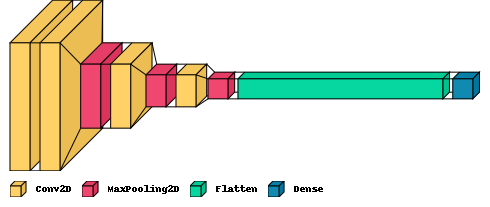

In [ ]:
# Visualize Model
visualkeras.layered_view(model2,legend = True)

In [ ]:
# Model Training
model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

hist2 = model2.fit(x_train, y_train,
          #steps_per_epoch = len(x_train)/batch_size,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          verbose=1)

Epoch 1/100
447/450 [============================>.] - ETA: 0s - loss: 1.5609 - accuracy: 0.4425
Epoch 00001: val_loss improved from inf to 1.17510, saving model to best_weights.hdf5
450/450 [==============================] - 5s 8ms/step - loss: 1.5587 - accuracy: 0.4433 - val_loss: 1.1751 - val_accuracy: 0.5938
Epoch 2/100
448/450 [============================>.] - ETA: 0s - loss: 1.0595 - accuracy: 0.6285
Epoch 00002: val_loss improved from 1.17510 to 1.02529, saving model to best_weights.hdf5
450/450 [==============================] - 3s 7ms/step - loss: 1.0591 - accuracy: 0.6287 - val_loss: 1.0253 - val_accuracy: 0.6352
Epoch 3/100
447/450 [============================>.] - ETA: 0s - loss: 0.8561 - accuracy: 0.7029
Epoch 00003: val_loss improved from 1.02529 to 0.82798, saving model to best_weights.hdf5
450/450 [==============================] - 3s 7ms/step - loss: 0.8556 - accuracy: 0.7030 - val_loss: 0.8280 - val_accuracy: 0.7234
Epoch 4/100
447/450 [============================>

## **Αποτελέσματα και οπτικοποίησή τους**
***Results and their visualization***

In [ ]:
# Model Evaluation
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7627 - accuracy: 0.7438
Test loss: 0.7626890540122986
Test accuracy: 0.7437999844551086


Text(0.5, 1.0, ' CNN Confusion Matrix')

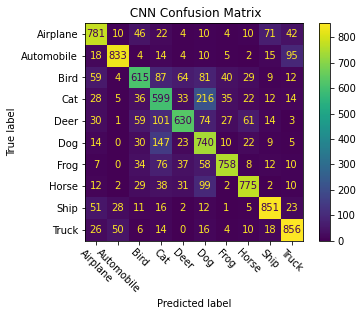

In [ ]:
y_hat2 = model2.predict(x_test)
# make predictions with classifier
classes = np.argmax(y_hat2,axis=1) # convert to class numbers

# Create confusion matrix
M = confusion_matrix(np.argmax(y_test, axis=1), classes) # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=cifar10_labels).plot(xticks_rotation=-45)
plt.title(' CNN Confusion Matrix')

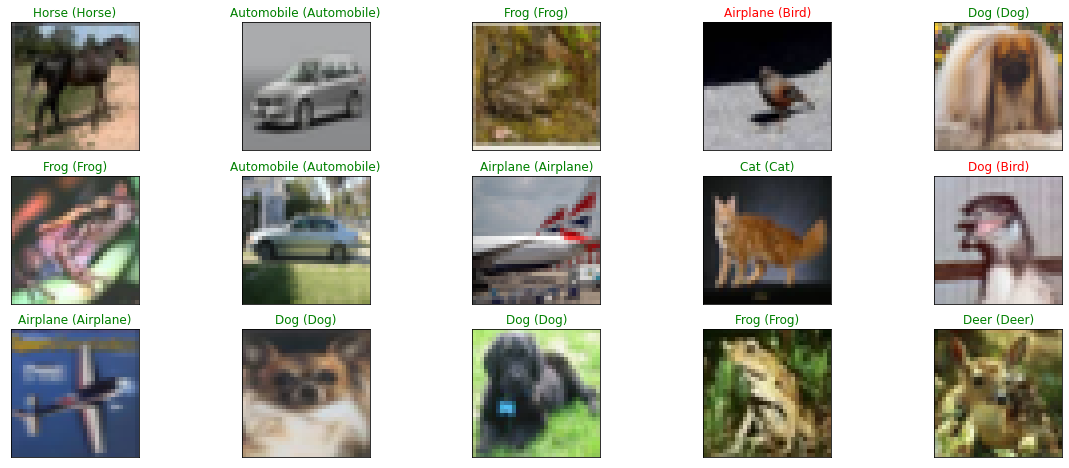

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(32,32,3))) # reshape image in order to plot
    predict_index = np.argmax(y_hat2[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

## **My Network**

In [ ]:
model3 = Sequential()
# Input layer
model3.add(BatchNormalization(axis=1)) 
model3.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(32,32,3),padding='same'))

# First Hidden Layer
model3.add(BatchNormalization(axis=1)) 
model3.add(Conv2D(32, kernel_size=(3, 3),  activation='relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.2))

# Second Hidden Layer
model3.add(BatchNormalization(axis=1)) 
model3.add(Conv2D(64,kernel_size = (3, 3), activation='relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.25))


# Third Hidden Layer
model3.add(BatchNormalization(axis=1)) 
model3.add(Conv2D(64,kernel_size = (3, 3), activation='relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.3))

# Fourth Hidden Layer
model3.add(BatchNormalization(axis=1)) 
model3.add(Conv2D(128,kernel_size = (3, 3), activation='relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.35))


# Output Layer
model3.add(Flatten())
model3.add(BatchNormalization(axis=1))
model3.add(Dense(16,activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10,activation='softmax')) # decision neuron

model3.build(input_shape=(batch_size,32,32,3))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (100, 32, 32, 3)         128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (100, 32, 32, 32)         896       
                                                                 
 batch_normalization_13 (Bat  (100, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (100, 32, 32, 32)         9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (100, 16, 16, 32)        0         
 g2D)                                                            
                                                      

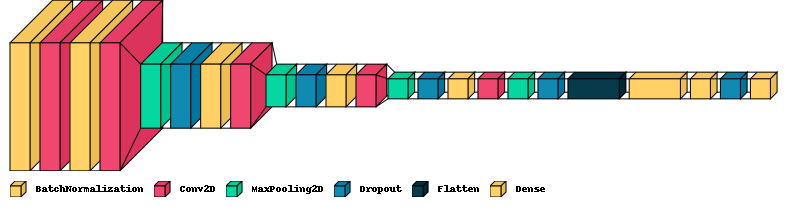

In [ ]:
# Visualize Model
visualkeras.layered_view(model3,legend = True)

In [ ]:
# Train Model
model3.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Use of callbacks to reduce overfitting

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

hist3 = model3.fit(x_train, y_train,
          #steps_per_epoch = len(x_train)/batch_size,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          shuffle = True,
          verbose=1)

Epoch 1/100
450/450 [==============================] - ETA: 0s - loss: 1.9446 - accuracy: 0.2972
Epoch 00001: val_loss improved from inf to 1.74296, saving model to best_weights.hdf5
450/450 [==============================] - 8s 12ms/step - loss: 1.9446 - accuracy: 0.2972 - val_loss: 1.7430 - val_accuracy: 0.3496
Epoch 2/100
446/450 [============================>.] - ETA: 0s - loss: 1.5268 - accuracy: 0.4382
Epoch 00002: val_loss improved from 1.74296 to 1.25062, saving model to best_weights.hdf5
450/450 [==============================] - 5s 11ms/step - loss: 1.5259 - accuracy: 0.4384 - val_loss: 1.2506 - val_accuracy: 0.5576
Epoch 3/100
446/450 [============================>.] - ETA: 0s - loss: 1.3462 - accuracy: 0.5111
Epoch 00003: val_loss improved from 1.25062 to 1.11802, saving model to best_weights.hdf5
450/450 [==============================] - 5s 11ms/step - loss: 1.3456 - accuracy: 0.5111 - val_loss: 1.1180 - val_accuracy: 0.5948
Epoch 4/100
450/450 [==========================

In [ ]:
# Model Evaluation
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.4894 - accuracy: 0.8430
Test loss: 0.48939210176467896
Test accuracy: 0.8429999947547913


Text(0.5, 1.0, ' My CNN Confusion Matrix')

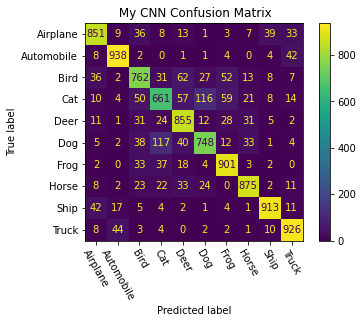

In [ ]:
# make predictions with model
y_pred3 = model3.predict(x_test) # predict response using test samples
classes3 = np.argmax(y_pred3,axis=1) # convert to class numbers in decimal representation
y2 = np.argmax(y_test,axis=1)
M = confusion_matrix(y2, classes3)  # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=cifar10_labels).plot(xticks_rotation=-60)
plt.title(' My CNN Confusion Matrix')

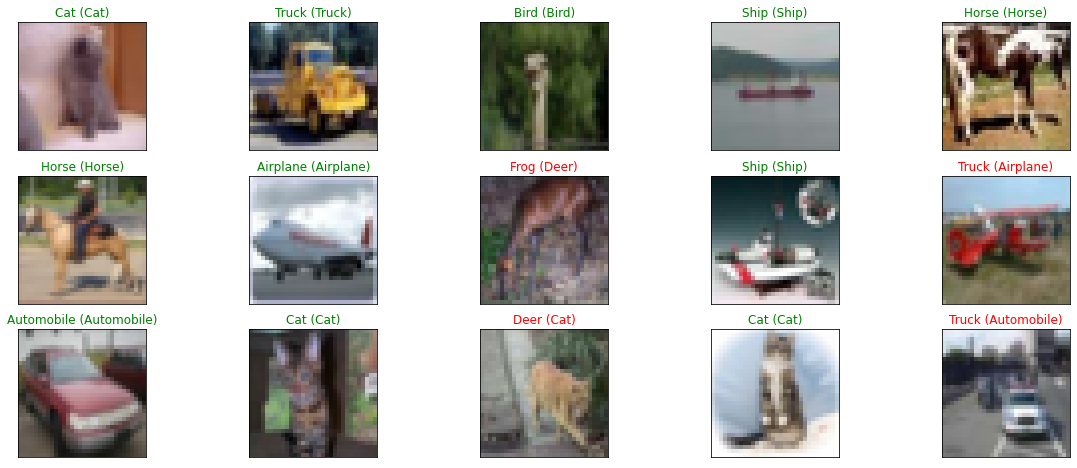

In [ ]:
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(32,32,3))) # reshape image in order to plot
    predict_index = np.argmax(y_pred3[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

***Συγκριτικά plot των μετρικών loss, accuracy για κάθε δίκτυο***

***Comparative plots of loss, accuracy for each network***

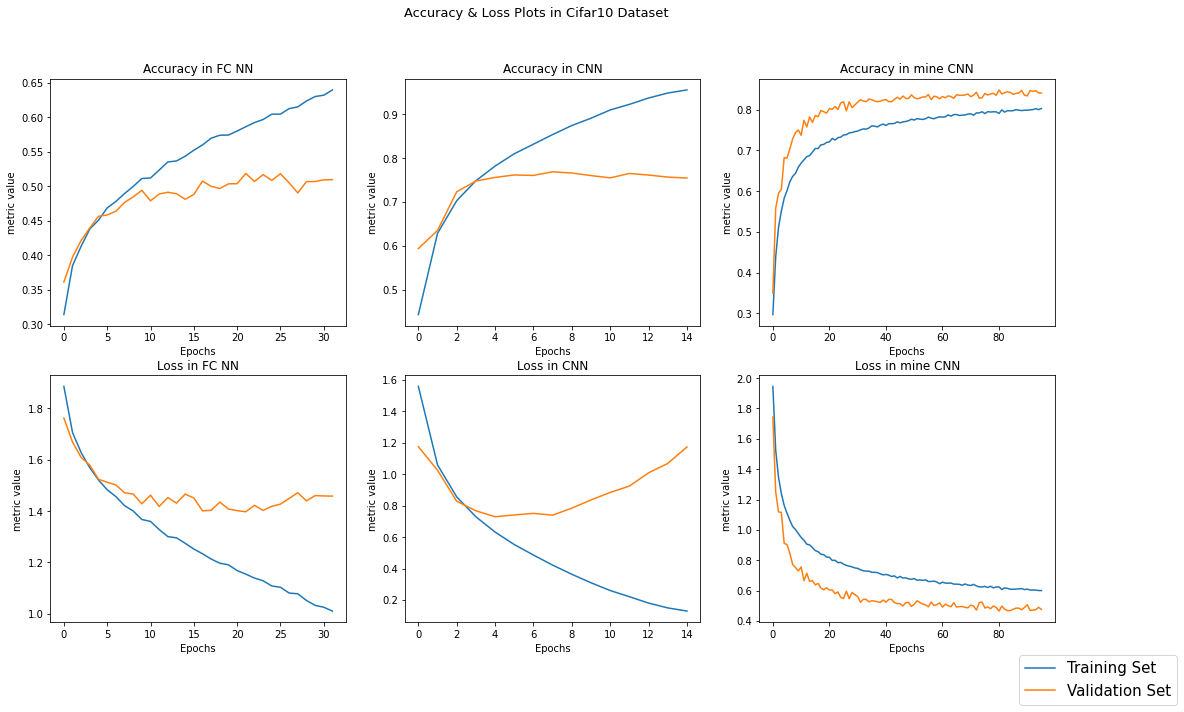

In [ ]:
# Plot Accuracy, Loss Metrics for each model

fig, axs = plt.subplots(2, 3, figsize = (18, 10))#, constrained_layout = True)

fig.suptitle('Accuracy & Loss Plots in Cifar10 Dataset', fontsize = 13)
# Plot FC NN Metrics
axs[0, 0].plot(hist.history['accuracy'])
axs[0, 0].plot(hist.history['val_accuracy'])
axs[0, 0].set_title('Accuracy in FC NN', fontsize = 12)
axs[1, 0].plot(hist.history['loss'])
axs[1, 0].plot(hist.history['val_loss'])
axs[1, 0].set_title('Loss in FC NN', fontsize = 12)
# Plot CNN Metrics
axs[0, 1].plot(hist2.history['accuracy'])
axs[0, 1].plot(hist2.history['val_accuracy'])
axs[0, 1].set_title('Accuracy in CNN', fontsize = 12)
axs[1, 1].plot(hist2.history['loss'])
axs[1, 1].plot(hist2.history['val_loss'])
axs[1, 1].set_title('Loss in CNN', fontsize = 12)
# Plot mine CNN Metrics
axs[0, 2].plot(hist3.history['accuracy'])
axs[0, 2].plot(hist3.history['val_accuracy'])
axs[0, 2].set_title('Accuracy in mine CNN', fontsize = 12)
axs[1, 2].plot(hist3.history['loss'])
axs[1, 2].plot(hist3.history['val_loss'])
axs[1, 2].set_title('Loss in mine CNN', fontsize = 12)

for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='metric value')
fig.legend(['Training Set', 'Validation Set'],loc = 'lower right', fontsize = 15)